In [1]:
import numpy as np
import qiskit
from qiskit.quantum_info.operators import Operator
from tools import *

Performing block encoding of $2\times2$ matrix on the form:
\begin{equation}
A=\frac{1}{2}(\alpha_1I+\alpha_2\sigma_x)=\frac{1}{2}\begin{pmatrix} \alpha_1 \alpha_2 \\ \alpha_2 \alpha_1
\end{pmatrix}
\end{equation}

In [2]:
# Defining arbitrary symmetric A
alpha_1, alpha_2 = 3, 4
A = 1/2 * np.array([[alpha_1, alpha_2],[alpha_2, alpha_1]])
print(A)

[[1.5 2. ]
 [2.  1.5]]


In [3]:
# Normalizing w. respect to spectral norm
spectral_norm = np.sqrt(np.max(np.linalg.eigvals(A.T@A-np.eye(2))))
A = 1/2*A/spectral_norm
print(A)

[[0.2236068 0.2981424]
 [0.2981424 0.2236068]]


In [4]:
# Updating alpha_1, alpha_2 definition
alpha_1, alpha_2 = 2*A[0,0], 2*A[0,1]
print(alpha_1,alpha_2)

0.4472135954999579 0.5962847939999439


In [5]:
print("That")
print(alpha_1/2, alpha_2/2)

That
0.22360679774997896 0.29814239699997197


In [6]:
# Defining rotation angles
theta_1 = np.arccos(alpha_1)
theta_2 = np.arccos(alpha_2) - theta_1
print(theta_1, theta_2)

1.1071487177940904 -0.17521753523460504


### Performing exact simulation

Initializing q_2 = |0>


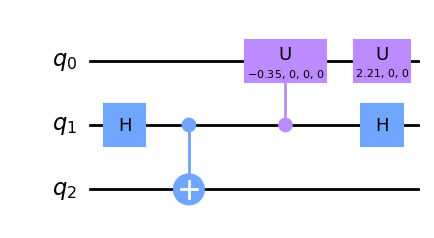

In [7]:
# Creating Quantum Circuit (Qubits initialized to |0> by default)
print("Initializing q_2 = |0>")
circ = QuantumCircuit(3)
circ.h(qubit=1)
circ.cx(control_qubit=1,
        target_qubit=2)
circ.cu(theta=2*theta_2,phi=0.0,gamma=0.0,lam=0.0,control_qubit=1,target_qubit=0) # N.B. Remember to rotate by the double amount
circ.u(theta=2*theta_1, phi=0.0,lam=0.0,qubit=0) # N.B. Remember to rotate by the double amount
circ.h(qubit=1)
circ.draw('mpl')

In [8]:
type(circ)

qiskit.circuit.quantumcircuit.QuantumCircuit

In [9]:
# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')
job = backend.run(circ)
result = job.result()
statevector_result = np.real_if_close(np.array(result.data()['statevector']))
print(statevector_result)

MissingOptionalLibraryError: "The 'qiskit-aer' library is required to use 'Aer provider'. You can install it with 'pip install qiskit-aer'."

In [ ]:
# Creating Quantum Circuit (Qubits initialized to |0> by default)
print("Initializing q_2 = |1>")
circ = QuantumCircuit(3)
circ.x(qubit=2)
circ.h(qubit=1)
circ.cx(control_qubit=1,
        target_qubit=2)
circ.cu(theta=2*theta_2,phi=0.0,gamma=0.0,lam=0.0,control_qubit=1,target_qubit=0) # N.B. Remember to rotate by the double amount
circ.u(theta=2*theta_1, phi=0.0,lam=0.0,qubit=0) # N.B. Remember to rotate by the double amount
circ.h(qubit=1)
circ.draw('mpl')

In [ ]:
# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')
job = backend.run(circ)
result = job.result()
statevector_result = np.real_if_close(np.array(result.data()['statevector']))
print(statevector_result)

### Simulating quantum device

In [ ]:
# Creating Quantum Circuit (Qubits initialized to |0> by default)
circ = QuantumCircuit(3)
#circ.x(qubit=2)
circ.h(qubit=1)
circ.cx(control_qubit=1,
        target_qubit=2)
circ.cu(theta=2*theta_2,phi=0.0,gamma=0.0,lam=0.0,control_qubit=1,target_qubit=0) # N.B. Remember to rotate by the double amount
circ.u(theta=2*theta_1, phi=0.0,lam=0.0,qubit=0) # N.B. Remember to rotate by the double amount
circ.h(qubit=1)
circ.measure_all()
circ.draw('mpl')

In [ ]:
backend = Aer.get_backend('qasm_simulator')
backend.shots = 10000
result = execute(circ, backend).result()
counts = result.get_counts()
print(get_state_vector(counts=counts))
plot_count_histogram(counts=counts)

### Encoding normalized real vector

In [ ]:
b_1, b_2 = 1,2
b = np.array([b_1, b_2])/np.sqrt(b_1**2+b_2**2)
print(b)

In [ ]:
theta = 2*np.arccos(b[0])
phi = 0 # Choose phi depending on sign of second entry in b vector.
lmbda = 0
theta, phi

In [ ]:
# Creating Quantum Circuit (Qubits initialized to |0> by default)
circ = QuantumCircuit(1)
circ.u(theta=theta, phi=phi,lam=lmbda,qubit=0)
circ.draw('mpl')

In [ ]:
# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')
job = backend.run(circ)
result = job.result()
statevector_result = np.real_if_close(np.array(result.data()['statevector']))
print(statevector_result)

In [ ]:
# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('unitary_simulator')
job = backend.run(circ)
result = job.result()
result.get_unitary()

# REMEMBER THAT QISKIT IS BACKWARDS!

In [ ]:
# Creating Quantum Circuit (Qubits initialized to |0> by default)
circ = QuantumCircuit(3)
circ.x(qubit=2)
circ.draw('mpl')

In [ ]:
# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')
job = backend.run(circ)
result = job.result()
statevector_result = np.real_if_close(np.array(result.data()['statevector']))
print(statevector_result.astype(int))

In [ ]:
print("this is the 'normal' way: \n")
print(qubit_vector('000').flatten())
print(qubit_vector('100').flatten())

# Trying to encode Fig. 9 of Berry article
(the qubit 'a' on the figure represents a register of possibly multiple qubits - here it is 2: q_1, q_2)

In [ ]:
# See: https://qiskit.org/documentation/tutorials/circuits_advanced/02_operators_overview.html for instructions on user-defined operators

def get_Ua(A: np.ndarray, q_2: int = 0) -> qiskit.quantum_info.operators.operator.Operator:
    """
    Constructs the unitary operator Ua that encodes a symmetric real 2x2 matrix 'A' as a quantum gate.

    Parameters
    ----------
    A : np.ndarray
        The symmetric real 2x2 matrix to be encoded as a quantum gate.
    q_2 : int, optional
        The value of qubit 2, which should be either 0 or 1. Defaults to 0.

    Returns
    -------
    qiskit.quantum_info.operators.operator.Operator
        The operator Ua as a `qiskit.quantum_info.Operator` object.

    Raises
    ------
    ValueError
        If `q_2` is not equal to 0 or 1.
        If `A` is not a 2x2 symmetric real matrix.
    """


    if q_2 != 0 and q_2 != 1:
        raise ValueError("q_2 should have the value of either '0' or '1'. ")
    if A.shape[0] != A.shape[1] or A.shape[0] != 2:
        raise ValueError("The given matrix 'A' should be 2x2.")
    if not check_symmetric(a=A):
        raise ValueError("The given matrix 'A' should be symmetric.")
    if not np.isreal(A):
        raise ValueError("The given matrix 'A' should only contain real numbers.")

    # Normalizing w. respect to spectral norm
    _spectral_norm = np.sqrt(np.max(np.linalg.eigvals(A.T@A-np.eye(2))))
    _A = 1/2*A/spectral_norm
    # Updating alpha_1, alpha_2 definition
    _alpha_1, _alpha_2 = 2*A[0,0], 2*A[0,1]
    # Defining rotation angles
    _theta_1 = np.arccos(_alpha_1)
    _theta_2 = np.arccos(_alpha_2) - _theta_1

    _NR_QUBITS = 3
    _circ = QuantumCircuit(_NR_QUBITS)
    if q_2 == 0:
        _circ.x(qubit=2)
    _circ.h(qubit=1)
    _circ.cx(control_qubit=1,target_qubit=2)
    _circ.cu(theta=2*_theta_2,phi=0.0,gamma=0.0,lam=0.0,control_qubit=1,target_qubit=0) # N.B. Remember to rotate by the double amount
    _circ.u(theta=2*_theta_1, phi=0.0,lam=0.0,qubit=0) # N.B. Remember to rotate by the double amount
    _circ.h(qubit=1)
    return Operator(_circ)

def get_Ub(b: np.ndarray) -> qiskit.quantum_info.operators.operator.Operator:
    """
    Constructs the unitary operator Ub that encodes the 'b' vector as a quantum gate.

    Parameters
    ----------
    b : numpy.ndarray
        A numpy array containing the 2 entries of the 'b' vector.

    Returns
    -------
    qiskit.quantum_info.operators.operator.Operator
        The operator Ub as a `qiskit.quantum_info.Operator` object.

    Raises
    ------
    ValueError
        If the length of the input vector 'b' is not 2.
        If the input vector 'b' does not contain only real values.

    """
    if len(b) != 2:
        raise ValueError("The vector 'b' should only contain 2 entries.")
    if not np.isreal(b):
        raise ValueError("The vector 'b' should only contain real values.")
    # Normalizing 'b' vector
    b *= 1.0/np.sqrt(b[0]**2+b[1]**2)
    # Calculating rotation-angles
    _theta = 2*np.arccos(b[0])
    _phi = 0 # TODO: Choose phi depending on sign of second entry in b vector.
    _lmbda = 0
    # Creating circuit and transforming to operator
    _circ = QuantumCircuit(1)
    _circ.u(theta=_theta, phi=_phi,lam=_lmbda,qubit=0)
    return Operator(_circ)


def dagger(operator: qiskit.quantum_info.operators.operator.Operator) -> qiskit.quantum_info.operators.operator.Operator:
    """
    Constructs the Hermitian conjugate of a given operator, i.e., its transpose and complex conjugate.

    Parameters
    ----------
    operator : qiskit.quantum_info.operators.operator.Operator
        The operator to compute the Hermitian conjugate of.

    Returns
    -------
    qiskit.quantum_info.operators.operator.Operator
        The Hermitian conjugate of the input operator as a `qiskit.quantum_info.Operator` object.
    """
    return Operator(operator.data.conjugate().T)


def schedule_function(s:float, kappa: float = 1.0, p: float = 3/2) -> float:
    """
    Returns the value of the schedule function at a given point (kappa, p, s) as described
    in the article 'Optimal Scaling Quantum Linear-Systems Solver via Discrete' Adiabatic Theorem.

    Parameters
    ----------
    kappa : float
        The condition number of the matrix.

    p : float
        A number between 1 and 2.

    s : float
        A number between 0 and 1 representing the current point in the annealing schedule.

    Returns
    -------
    float
        The value of the schedule function evaluated at the given (kappa, p, s).
    """
    if kappa <= 0 or kappa > 1:
        raise ValueError("kappa must be a number between 0 and 1.")
    if not (1 < p < 2):
        raise ValueError("'p' must be a number between 1 and 2.")
    if not (0 <= s <= 1):
        raise ValueError("'s' must be a number between 0 and 1.")
    return kappa / (kappa - 1.0) * (1.0 - (1.0 + s * (kappa ** (p - 1.0) - 1.0))) ** (1.0 / (1.0 - p))


def get_Rs(s: float) -> qiskit.quantum_info.operators.operator.Operator:
    """
    Constructs the reflection operator R(s).

    Parameters
    ----------
    s : float
        A number between 0 and 1 representing the current point in the annealing schedule.

    Returns
    -------
    qiskit.quantum_info.operators.operator.Operator
        The operator Rs as a `qiskit.quantum_info.Operator` object.

    Raises
    ------
    ValueError
        If 's' is not a number between 0 and 1.
    """
    if not (0 <= s <= 1):
        raise ValueError("'s' must be a number between 0 and 1.")
    _front_factor = 1.0 / np.sqrt((1.0 - schedule_function(s))**2 + schedule_function(s)**2)
    _matrix = np.array([[1.0 - schedule_function(s) , schedule_function(s)          ],
                        [schedule_function(s)       , -(1.0 - schedule_function(s)) ]])
    _matrix *= _front_factor
    return Operator(_matrix)
